
# Data Visualisation 

This week we are going to cover some tools for data visualisation, as well as some core concepts in the process of visualising data and in turn how that affects/effects what we can visualise and the limits of these tools. 

More specifically we will focus on situating our data visualisation(s). We will look at the importance of Critical Data Visualisation and how to do it.

## The Dataset

In this notebook, we will be using the Matplotlib library in Python to visualize fires data in the Brazilian amazon.

The version I am using is from this [Kaggle page](https://www.kaggle.com/datasets/mbogernetto/brazilian-amazon-rainforest-degradation) which also has other interesting data to explore (deforestation). This dataset is credited to INPE, [National Institute for Space Research](https://www.gov.br/inpe/pt-br). 

Essentially what we have is data on amount of fire outbreaks in Brazilian Amazon by *state* (region), *month and year*, *latitude* and *longitud* from 1999 to 2019.

The intention is to use this dataset and these features to visualise the data in a variety of ways, to explore the process of data visualisation and be critical of this process too.

First, we are going to visualise the data over time in a simple graph that can provide us with a clear and intuitive understanding of how the data is changing over time. Time series graphs, which are used to show how a variable changes over time, can help us identify patterns, trends, and relationships that may not be apparent when looking at the raw data.




## Load the Data

In [1]:
import pandas as pd

# Replace 'file_path.csv' with the actual file path
df = pd.read_csv('/Users/toniayon/iCloud Drive (Archive)/Documents/Education /Introduction to Data Science/GitHub/24-intro-to-data-science/2025_01/session03/data/brazilian_amazon_fires_1999_2019.csv')

# Display the first few rows
print(df.head())

   year  month        state   latitude  longitude  firespots
0  1999      1     AMAZONAS  -2.371113 -59.899933          3
1  1999      1     MARANHAO  -2.257395 -45.487831         36
2  1999      1  MATO GROSSO -12.660633 -55.057989         18
3  1999      1         PARA  -2.474820 -48.546967         87
4  1999      1     RONDONIA -12.861700 -60.513100          1


In [2]:
# Perform grouping and calculations
state_firespots_mean = df.groupby("state")["firespots"].mean()
print("Mean firespots by state:\n", state_firespots_mean)

Mean firespots by state:
 state
ACRE            619.955882
AMAPA           199.680203
AMAZONAS        753.932000
MARANHAO        666.153527
MATO GROSSO    2362.611111
PARA           3769.132000
RONDONIA       1384.215447
RORAIMA         193.337449
TOCANTINS        73.547511
Name: firespots, dtype: float64


## Visualising the Data

import libraries

In [3]:
import matplotlib.pyplot as plt

import pandas as pd




Bar Chart: Mean firespots by state

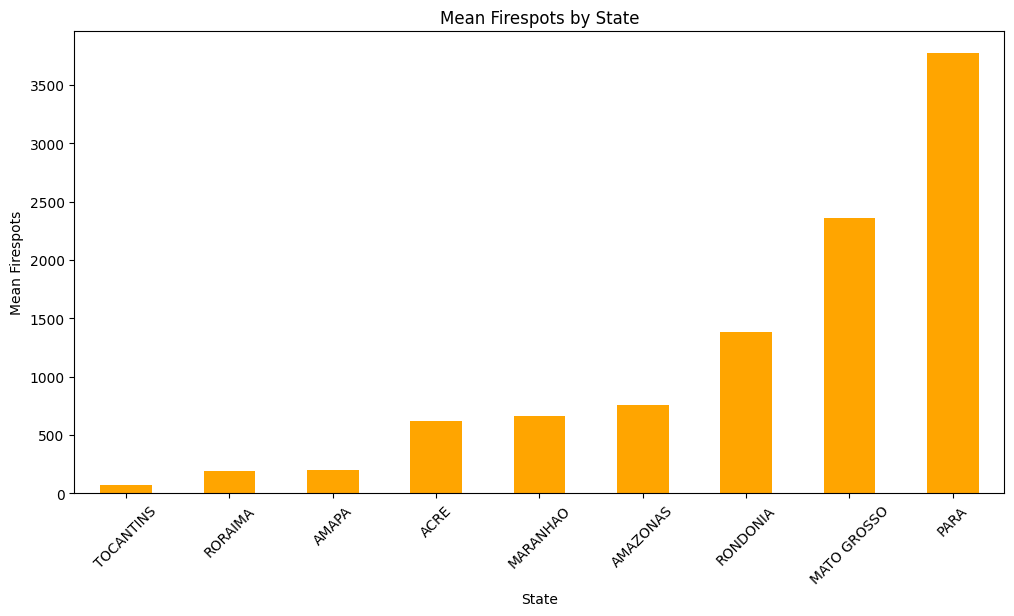

In [4]:
import matplotlib.pyplot as plt

# Plot mean firespots by state
state_firespots_mean.sort_values().plot(kind="bar", figsize=(12, 6), color="orange")
plt.title("Mean Firespots by State")
plt.xlabel("State")
plt.ylabel("Mean Firespots")
plt.xticks(rotation=45)  # Rotate state names for better readability
plt.show()


Scatter Plot: Firespots by Latitude and Longitude

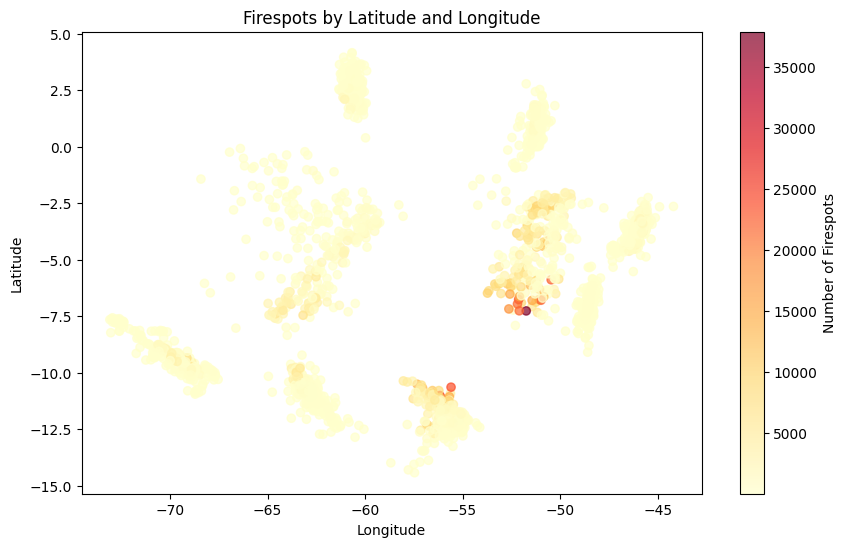

In [5]:
# Scatter plot of firespots
plt.figure(figsize=(10, 6))
plt.scatter(df["longitude"], df["latitude"], c=df["firespots"], cmap="YlOrRd", alpha=0.7)
plt.colorbar(label="Number of Firespots")
plt.title("Firespots by Latitude and Longitude")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()



Visualising a yearky firespots using a line chart

Total Firespots by Year:
 year
1999     62858
2000     48168
2001     69675
2002    273873
2003    174400
2004    218637
2005    213720
2006    144422
2007    186480
2008    103453
2009     81682
2010    134614
2011     58186
2012     86719
2013     58688
2014     82554
2015    106438
2016     87761
2017    107439
2018     68345
2019     88135
Name: firespots, dtype: int64


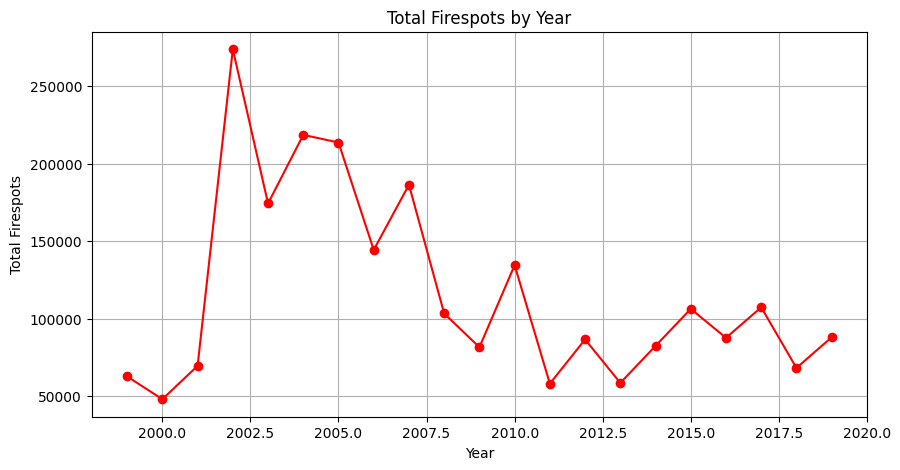

In [6]:
# Calculate total firespots by year
yearly_firespots = df.groupby("year")["firespots"].sum()

# Verify the calculation
print("Total Firespots by Year:\n", yearly_firespots)

# Plot total firespots by year
yearly_firespots.plot(kind="line", figsize=(10, 5), marker="o", color="red")
plt.title("Total Firespots by Year")
plt.xlabel("Year")
plt.ylabel("Total Firespots")
plt.grid(True)
plt.show()


Now a scatter plot (Yearly Firespots)

A scatter plot can brings to the front the individual data points, particularly if there are significant fluctuations between years.

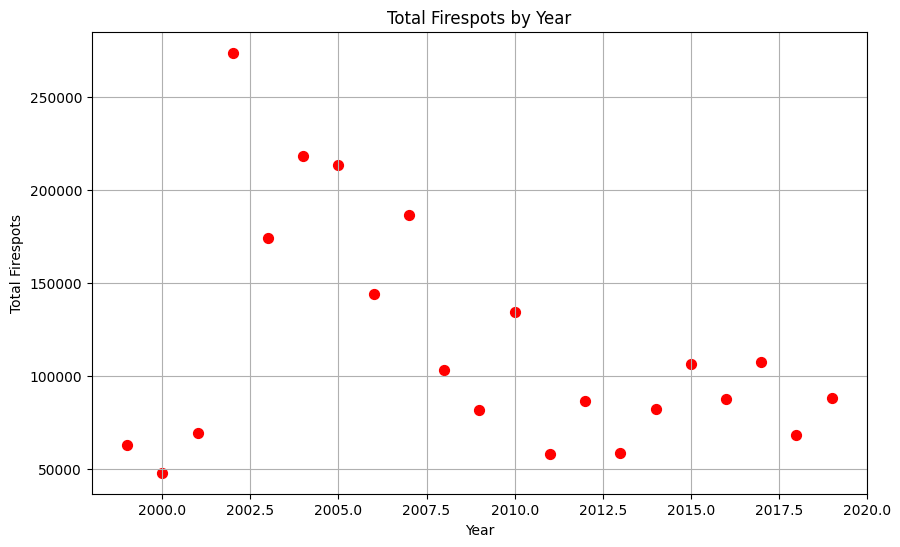

In [7]:
plt.figure(figsize=(10, 6))
plt.scatter(yearly_firespots.index, yearly_firespots.values, color="red", s=50)
plt.title("Total Firespots by Year")
plt.xlabel("Year")
plt.ylabel("Total Firespots")
plt.grid(True)
plt.show()


Stacked Bar Chart (grouped by states and years)

    If you want to show both yearly totals and how they are distributed among states, a stacked bar chart can be useful.

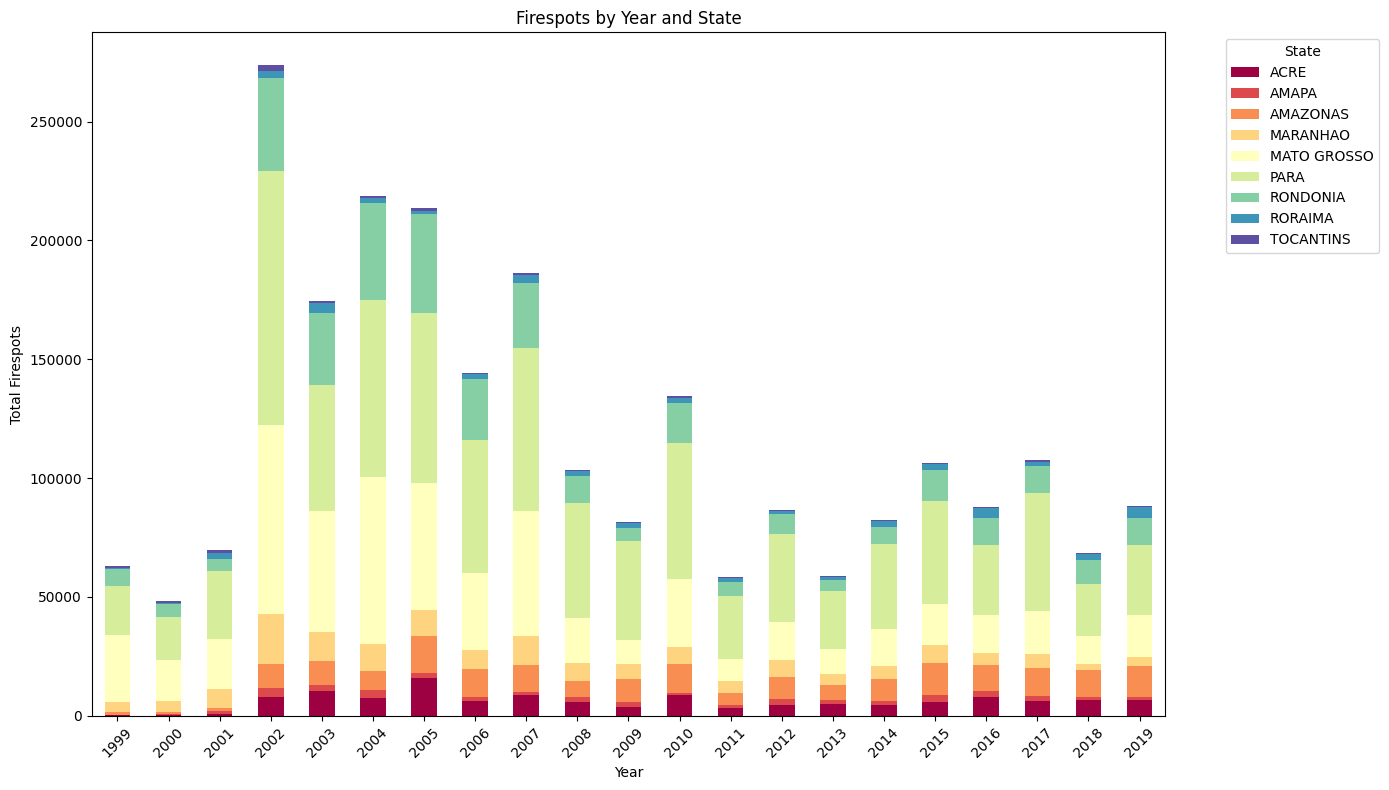

In [8]:
grouped = df.groupby(["year", "state"])["firespots"].sum().unstack()
grouped.plot(kind="bar", stacked=True, figsize=(14, 8), colormap="Spectral")
plt.title("Firespots by Year and State")
plt.xlabel("Year")
plt.ylabel("Total Firespots")
plt.legend(title="State", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [9]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


A heatmap provides an intuitive way to see the intensity of firespots for each state across years.

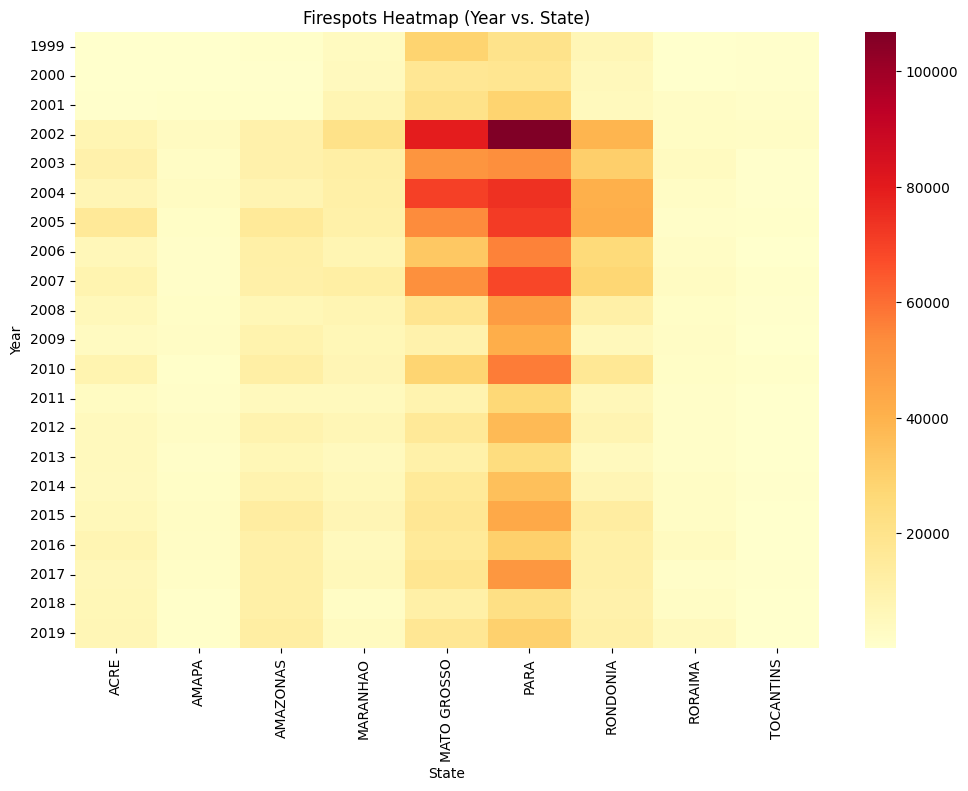

In [10]:
import seaborn as sns

heatmap_data = df.pivot_table(index="year", columns="state", values="firespots", aggfunc="sum")
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap="YlOrRd", annot=False, cbar=True)
plt.title("Firespots Heatmap (Year vs. State)")
plt.xlabel("State")
plt.ylabel("Year")
plt.show()


Area Chart

    An area chart is another alternative for visualising how firespots change over time, adding a sense of cumulative volume.

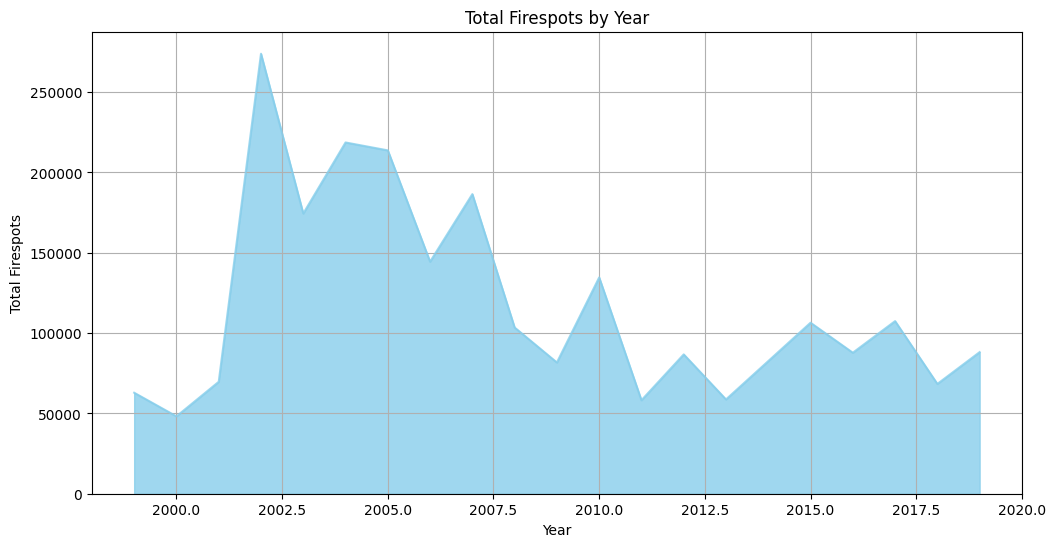

In [11]:
yearly_firespots.plot(kind="area", figsize=(12, 6), color="skyblue", alpha=0.8)
plt.title("Total Firespots by Year")
plt.xlabel("Year")
plt.ylabel("Total Firespots")
plt.grid(True)
plt.show()


But the firespots are represented in blue - what could be improved, so that we communicate fires per year is using colors that reference those events. In this case, instead of using bluesky, we should probably use a color that represents fire. 

**Task:** please change the plot area to a color that represents fire.

## Selecting the Best Chart

    Line Chart: Best for showing trends or patterns over time.
    Bar Chart: Great for discrete comparisons (e.g., yearly totals).
    Scatter Plot: Highlights individual data points and outliers.
    Stacked Bar Chart: Adds detail about the contribution of states to yearly totals.
    Heatmap: Useful for spotting patterns or hotspots across multiple dimensions.
    Area Chart: Adds a visual sense of accumulation or volume over time

#### There are other libraries that allow you to create visuals and which offer some kind of interactivity. For example, [bokeh](http://bokeh.org/)

Bokeh is a Python library for creating interactive visualizations for modern web browsers. It helps you build beautiful graphics, ranging from simple plots to complex dashboards with streaming datasets. With Bokeh, you can create JavaScript-powered visualizations without writing any JavaScript yourself.

![bokeh](data/bokeh.png)


Interactive data visualisation can be important because it helps users engage with and understand data more effectively. Key reasons include:

**Better exploration**: Interactivity allows users to drill into specific details, filter information, and focus on what matters most to them, making it easier to uncover insights that static visuals might miss.

**Clear understanding:** Users can interact with visual elements, such as zooming, hovering for details, or adjusting parameters, to grasp relationships, trends, and patterns more clearly.

**Customisation:** Interactive tools let users tailor the visualisation to their specific needs, ensuring the data is meaningful and relevant to a wide range of audiences.

**Increased engagement:** Interactive visualisations are more dynamic and engaging, which helps keep users interested and encourages them to explore the data further.

**Real-time analysis:** In scenarios where data is constantly changing, interactivity allows users to visualise and interpret shifts or patterns as they happen.

**Supports storytelling:** Interactivity enables users to explore different aspects of the data, helping them build their own narrative or discover connections within the information.



**Note:** To be able to see the output and interact with it we have to run the code and this will pop up in a web browser. 

![Fires Over Time with Bokeh](/Users/ysb1a23/Downloads/week3/data/bokeh_plot.gif)


By visualizing data in this way, we can quickly identify important insights and trends, and gain a deeper understanding of the data we are working with.

From both visuals we are able to see the amount of fire outbreaks over the years, from 1999 to 2019. 

But what if we want to see where, in what state (region) did they happen?

For that we could try a tool that will let us have a more comprehensive view of more data points and one that we visualise the relationships between all three variables simultaneously (*year, firespots, state*).

A 3D scatter plot in Plotly can offer a more comprehensive view of a larger number of data points, as it allows for the visualization of three variables simultaneously.

# Situating the Data: Critical Data Visualisation 

We can go on forever and try and visualize this dataset in many other plots but I actually want to put it into context and apply a feminist and decolonial framework.

How? 

A **decolonial and feminist approach** to data visualisation of the Brazil Amazon rainforest fires would also involve engaging in **community-based research** and **participatory design methods**, where **local communities are involved** in the data collection and visualization process. But we are here and there is no way of involving the communities directly and co-creating a visualisation of this data based on their experience. 

Let's try and use a map that will help us visualise firespots and the territories where they happened. 

**Why are territory and geography important in critical data visualisation?**



### We will use the library **cartopy** 

Cartopy is a Python library that provides tools for creating maps and working with geospatial data. It is especially useful in combination with Matplotlib for generating high-quality visualisations that include geographic information.

In [12]:
pip install cartopy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.0/11.0 MB 6.4 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 13.3 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 11.7 MB/s eta 0:00:00
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
Note: you may need to restart the kernel to use updated packages.


import all necessary libraries

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [14]:

# Extract relevant columns
lat = df['latitude']
lon = df['longitude']
firespots = df['firespots']

In [15]:



# Create the map
fig = plt.figure(figsize=(12, 8))
ax = plt.axes(projection=ccrs.PlateCarree())  # Use PlateCarree for lat/lon projection
ax.set_extent([-75, -30, -35, 5], crs=ccrs.PlateCarree())  # Set map extent to Brazil's region

# Add map features
ax.coastlines(resolution='110m')
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAND, facecolor='lightgray')
ax.add_feature(cfeature.OCEAN, facecolor='lightblue')

# Plot the firespots as a scatter plot
scatter = ax.scatter(lon, lat, c=firespots, cmap='YlOrRd', s=10, alpha=0.75, transform=ccrs.PlateCarree())

# Add a colorbar
cbar = plt.colorbar(scatter, orientation='vertical', shrink=0.5, pad=0.05)
cbar.set_label('Firespots')

# Add a title
plt.title('Firespots in the Brazilian Amazon (1999-2019)', fontsize=16)

# Show the map
plt.show()


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_physical/ne_50m_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


URLError: <urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:1006)>

<Figure size 1200x800 with 2 Axes>

I chose this map feature as a first instance of data visualisation, for few reasons:

1. Maps can be powerful data visuals in situated critical data visualization, as they can help to visualize the geographic context and spatial relationships of data.

2. Maps can provide geographic context to data, allowing viewers to see how data is distributed across different regions and locations. This can help to identify patterns and trends in the data that may not be immediately apparent from other types of visualizations.

**Territory and geography** are important in critical data visualisation because it tells us where this data is coming from. It is no longer from **nowhere** but it comes from **a place - a territory - a geographical location.** It is now also pointing us towards: If it comes from a place, it must also come from a place where there is culture, people, nature, and/or other physical beings.


This notebook was created by Yadira Sanchez as part of the Intro to Data Science unit of MScDSAI at UAL.
